In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras as ks
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
print(df.shape, df2.shape)

(485, 2) (324, 1)


In [3]:
df.head(5)


,Name,flying
0,starly,1
1,nidoran-m,0
2,dewpider,0
3,pichu,0
4,dragonite,1


In [4]:
df2.head(5)


,Name
0,keldeo-ordinary
1,chinchou
2,doduo
3,kecleon
4,paras


In [5]:
dff = df.sort_values(by=['Name'], ascending=True).reset_index(drop=True)


In [6]:
dff.head(10)


,Name,flying
0,absol,0
1,accelgor,0
2,alakazam,0
3,alomomola,0
4,ampharos,0
5,araquanid,0
6,arbok,0
7,arcanine,0
8,archen,1
9,ariados,0


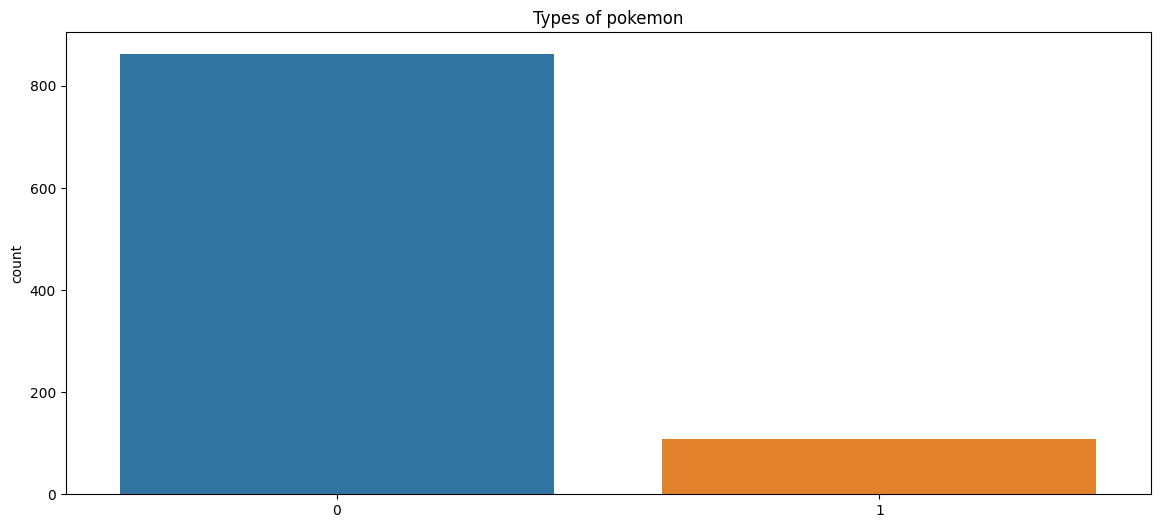

In [7]:
type1 = df['flying'].tolist()
type2 = df['flying'].tolist()

typo = type1 + type2

plt.figure(figsize=(14, 6))

sns.countplot(x=typo)
plt.title('Types of pokemon')
plt.show()

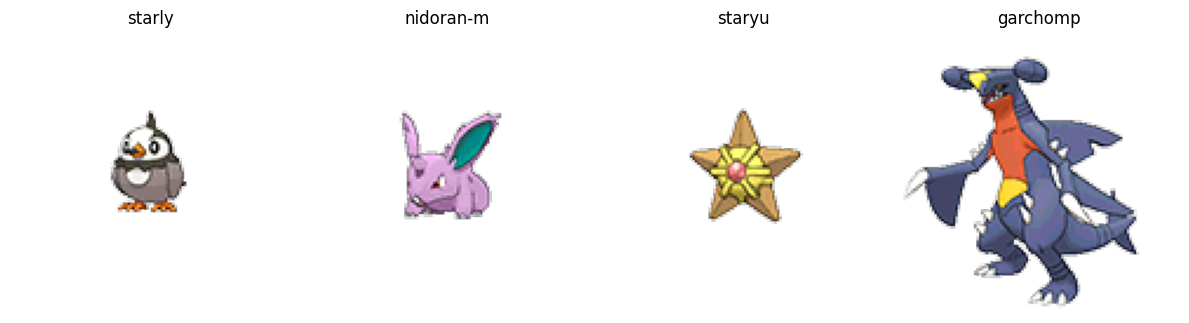

In [8]:
path = 'pokemons/images/'
fig,((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4]
for i in range(4):
    img = mpimg.imread(path+df['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(df['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [9]:
img_name = sorted(os.listdir('pokemons/images/'))
img_paths = []
img_paths2 = []
# print(img_name[0].split('.')[0])
for i in img_name:
    if i.split('.')[0] in df['Name'].values:
        img_paths.append(path + i)
    if i.split('.')[0] in df2['Name'].values:
        img_paths2.append(path + i)


In [10]:
df['filepath'] = img_paths
df2['filepath'] = img_paths2


In [11]:
df

,Name,flying,filepath
0,starly,1,pokemons/images/absol.png
1,nidoran-m,0,pokemons/images/accelgor.png
2,dewpider,0,pokemons/images/alakazam.png
3,pichu,0,pokemons/images/alomomola.png
4,dragonite,1,pokemons/images/ampharos.png
...,...,...,...
480,togepi,0,pokemons/images/yanmega.png
481,carbink,0,pokemons/images/zangoose.png
482,starmie,0,pokemons/images/zapdos.png
483,taillow,1,pokemons/images/zorua.png


In [12]:
# from keras_vggface.utils import preprocess_input

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    validation_split=0.1,
    # preprocessing_function=preprocess_input 

)

df['flying'] = df['flying'].astype(str)
train_generator = train_datagen.flow_from_dataframe(
    df, 
    x_col='filepath', y_col='flying',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    df , x_col='filepath', y_col='flying',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 437 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.


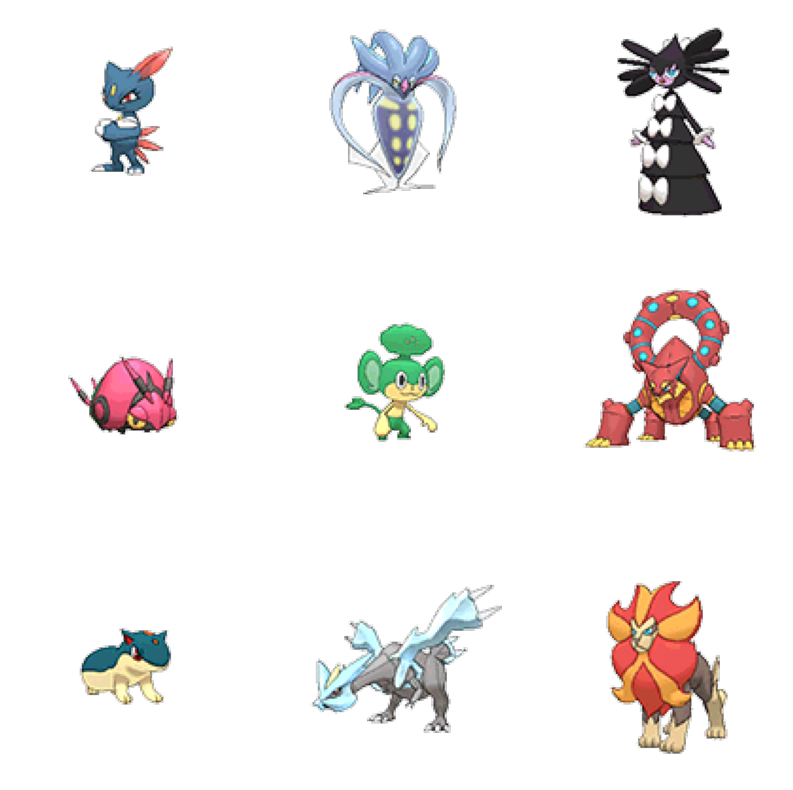

In [13]:
image_sample = train_generator.next()[0]

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

In [14]:
from keras import Sequential
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
from keras.optimizers import RMSprop

model = tf.keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(120,120, 4)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)


model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [16]:
# history = model.fit(
#     train_generator, 
#     validation_data=validation_generator,
#     batch_size=20, 
#     epochs=10,
    
# )

In [17]:
for x, y in train_generator:
    print(x.shape)
    break


(32, 120, 120, 4)


In [18]:
hehehe = model.fit_generator(
                    train_generator,
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    epochs=10, 
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/10


C:\Users\Nitro5\AppData\Local\Temp\ipykernel_2028\1860969222.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hehehe = model.fit_generator(


13/13 [==============================] - 15s 1s/step - loss: 0.6822 - acc: 0.8765 - val_loss: 0.5542 - val_acc: 0.8750
Epoch 2/10
13/13 [==============================] - 5s 360ms/step - loss: 0.5210 - acc: 0.8889 - val_loss: 0.4836 - val_acc: 0.8750
Epoch 3/10
13/13 [==============================] - 5s 354ms/step - loss: 0.4781 - acc: 0.8840 - val_loss: 0.4679 - val_acc: 0.8750
Epoch 4/10
13/13 [==============================] - 5s 361ms/step - loss: 0.4631 - acc: 0.8889 - val_loss: 0.5453 - val_acc: 0.8438
Epoch 5/10
13/13 [==============================] - 5s 361ms/step - loss: 0.4164 - acc: 0.8938 - val_loss: 0.3713 - val_acc: 0.9062
Epoch 6/10
13/13 [==============================] - 5s 364ms/step - loss: 0.4055 - acc: 0.9012 - val_loss: 0.4484 - val_acc: 0.8750
Epoch 7/10
13/13 [==============================] - 5s 366ms/step - loss: 0.4047 - acc: 0.8914 - val_loss: 0.3641 - val_acc: 0.9062
Epoch 8/10
13/13 [==============================] - 5s 368ms/step - loss: 0.3927 - acc: 0

In [23]:
hehehe.history['acc']

[0.8765432238578796,
 0.8888888955116272,
 0.8839505910873413,
 0.8888888955116272,
 0.8938271403312683,
 0.9012345671653748,
 0.8913580179214478,
 0.8888888955116272,
 0.8888888955116272,
 0.8913580179214478]

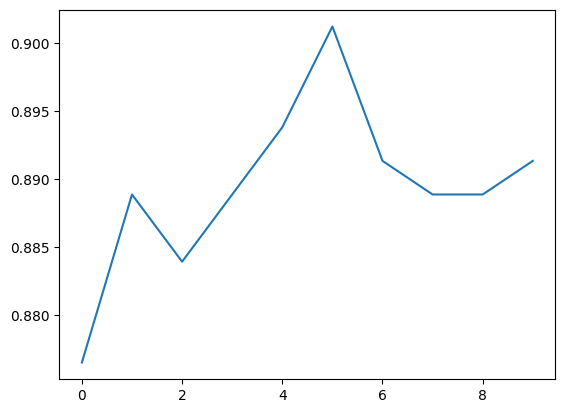

In [24]:
plt.plot(hehehe.history['acc'])

In [25]:
model.save('pokemon.h5')

In [27]:
from PIL import Image

image_p = "pokemons/images/darkrai.png"
image = Image.open(image_p).convert("RGBA")
image_array = np.array(image) 

prediction = model.predict(np.expand_dims(image_array, axis=0))
predicted_class = np.argmax(prediction)


print("метка класса:", predicted_class)


1/1 [==============================] - 0s 52ms/step
метка класса: 0


In [40]:
import pandas as pd
import numpy as np
from PIL import Image


# Создание списка для хранения предсказаний
predictions = []

# Проход по каждой записи в тестовом датасете
for index, row in df2.iterrows():
    # Получение пути к файлу изображения
    image_path = row['filepath']
    
    # Загрузка изображения
    image = Image.open(image_path)
    
    # Приведение изображения к размеру (120, 120)
    # image = image.resize((120, 120))
    
    # Преобразование изображения в массив numpy
    # image = np.array(image)
    
    # Нормализация значений пикселей
    # image = image / 255.0
    
    # Подача изображения на вход модели для получения предсказания
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Преобразование предсказания в бинарное значение
    prediction = (prediction > 0.5).astype(int).flatten()
    
    # Добавление предсказания в список
    predictions.append(prediction[0])

# Добавление предсказаний в датафрейм
test_df['flying'] = predictions

# Сохранение результатов в файл
test_df.to_csv('test_results.csv', index=False)


1/1 [==============================] - 0s 60ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 724, in start
      self.io_loop.start()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 408, in dispatch_shell
      await result
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Nitro5\AppData\Local\Temp\ipykernel_2028\3373021299.py", line 27, in <module>
      prediction = model.predict(np.expand_dims(image, axis=0))
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Nitro5\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
convolution input must be 4-dimensional: [1,120,120]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_3793]